In [2]:
import pandas as pd
import sqlite3

In [3]:
#The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017

In [4]:
sqlite3.connect('database_name')
conn = sqlite3.connect('database_name') 
c = conn.cursor()


In [5]:
df = pd.read_csv(r'C:\Users\lstev\Downloads\globalterrorismdb_0718dist.csv',encoding='latin-1',low_memory=False)

In [6]:
df.to_sql('database_name', conn, if_exists='append', index=False)

181691

In [7]:
sql_data = pd.read_sql('select * from database_name where country_txt="Greece"', conn)

In [8]:
#total  Terrorism for Greece

In [9]:
total_for_Greece= pd.read_sql('select count(*) as total from database_name where country_txt="Greece"', conn)

In [10]:
#total  Terrorism for Greece year
total_for_Greece_and_year=total_for_Greece= pd.read_sql('select count (*),iyear as total from database_name where country_txt="Greece" group by iyear order by count (*) desc limit 3', conn)
total_for_Greece_and_year

,count (*),total
0,345,2009
1,171,1991
2,165,1990


In [11]:
#total Terrorism for world 
total_for_world= pd.read_sql('select count (*) total from database_name where country_txt is not null',conn)
total_for_world

,total
0,545073


In [32]:
total_for_world_and_country=pd.read_sql('select count (*) as total,country_txt as country from database_name group by country order by count (*) desc limit 5', conn)
total_for_world_and_country['total']

df = pd.DataFrame({'country':total_for_world_and_country['total'], 'values':total_for_world_and_country['country']})

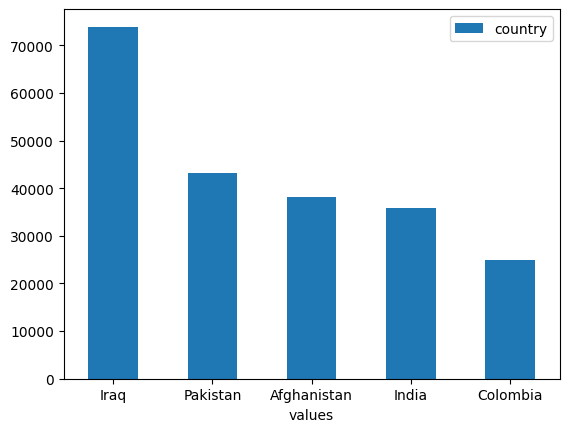

In [33]:
ax = df.plot.bar(x='values', y='country', rot=0)
#plot bar with 5 most terrorist attacks


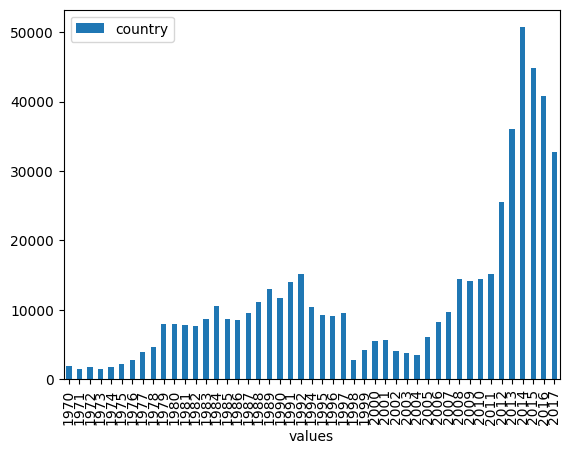

In [39]:
#plot bar over the years
total_for_world_years= pd.read_sql('select count (*),iyear as total from database_name group by iyear order by total', conn)
df = pd.DataFrame({'country':total_for_world_years['count (*)'], 'values':total_for_world_years['total']})
ax = df.plot.bar(x='values', y='country')


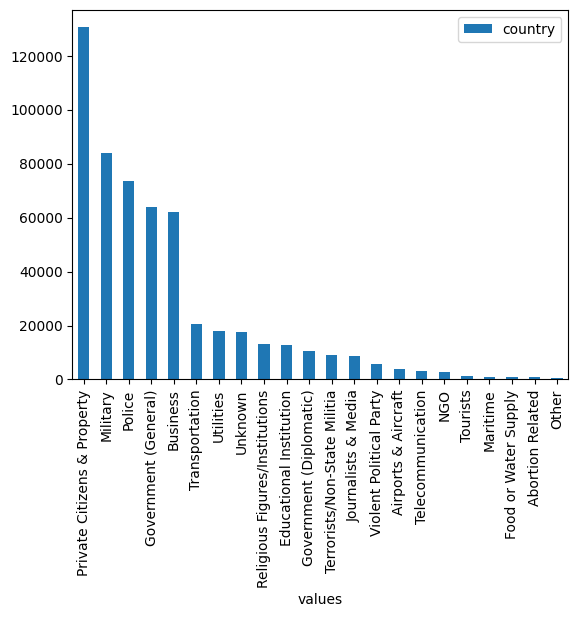

In [56]:
#targer types 


total_target_type= pd.read_sql('select count (*) as sum,targtype1_txt from database_name group by targtype1_txt order by sum  desc', conn)
df = pd.DataFrame({'country':total_target_type['sum'], 'values':total_target_type['targtype1_txt']})
ax = df.plot.bar(x='values', y='country')

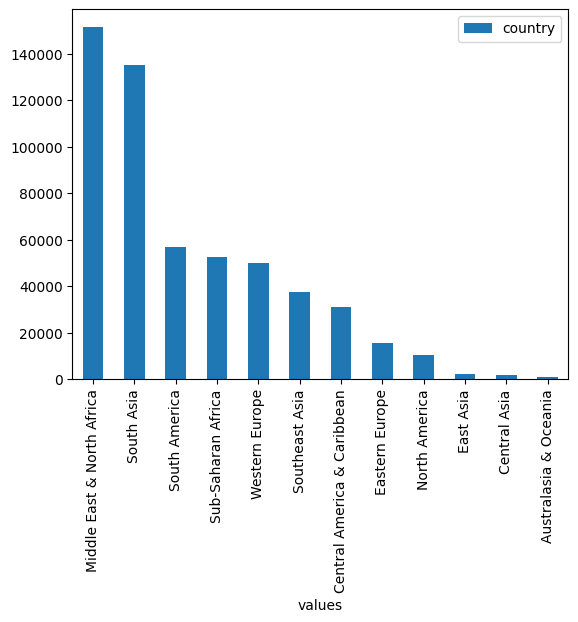

In [76]:
#region and sum 
total_target_per_region= pd.read_sql('select count (*) as sum,region_txt from database_name group by region_txt order by sum  desc', conn)
df = pd.DataFrame({'country':total_target_per_region['sum'], 'values':total_target_per_region['region_txt']})
ax = df.plot.bar(x='values', y='country')


,gname,count(*)
0,1 May,30
1,14 K Triad,12
2,14 March Coalition,3
3,14th of December Command,9
4,15th of September Liberation Legion,3
...,...,...
3532,Zulu Miners,3
3533,Zuwar al-Imam Rida,3
3534,Zviadists,3
3535,Zwai Tribe,3
